In [131]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [11]:
df=pd.read_csv('deliveries.csv')
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [13]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [19]:
runs=df[df['batsman_runs']>0]
runs=runs[['batter', 'batsman_runs']].value_counts().head(10)
runs

batter      batsman_runs
V Kohli     1               2591
S Dhawan    1               2102
RG Sharma   1               1996
SK Raina    1               1708
DA Warner   1               1682
MS Dhoni    1               1554
AM Rahane   1               1537
AT Rayudu   1               1495
KD Karthik  1               1464
KL Rahul    1               1464
Name: count, dtype: int64

In [21]:
a=df[(df['batter'] == 'V Kohli') & (df['batsman_runs'] > 0)]
a

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
134,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,V Kohli,I Sharma,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
877,335985,2,Royal Challengers Bangalore,Mumbai Indians,10,1,V Kohli,Harbhajan Singh,JH Kallis,1,0,1,NaN,0,NaN,NaN,NaN
880,335985,2,Royal Challengers Bangalore,Mumbai Indians,10,4,V Kohli,Harbhajan Singh,JH Kallis,1,0,1,NaN,0,NaN,NaN,NaN
884,335985,2,Royal Challengers Bangalore,Mumbai Indians,11,2,V Kohli,ST Jayasuriya,JH Kallis,4,0,4,NaN,0,NaN,NaN,NaN
885,335985,2,Royal Challengers Bangalore,Mumbai Indians,11,3,V Kohli,ST Jayasuriya,JH Kallis,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260278,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,5,5,V Kohli,Sandeep Sharma,C Green,4,0,4,NaN,0,NaN,NaN,NaN
260279,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,5,6,V Kohli,Sandeep Sharma,C Green,1,0,1,NaN,0,NaN,NaN,NaN
260280,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,6,1,V Kohli,R Ashwin,C Green,1,0,1,NaN,0,NaN,NaN,NaN
260282,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,6,3,V Kohli,R Ashwin,C Green,1,0,1,NaN,0,NaN,NaN,NaN


<h1><u>Top 10 Batsmen by Runs Scored</u></h1>

             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843


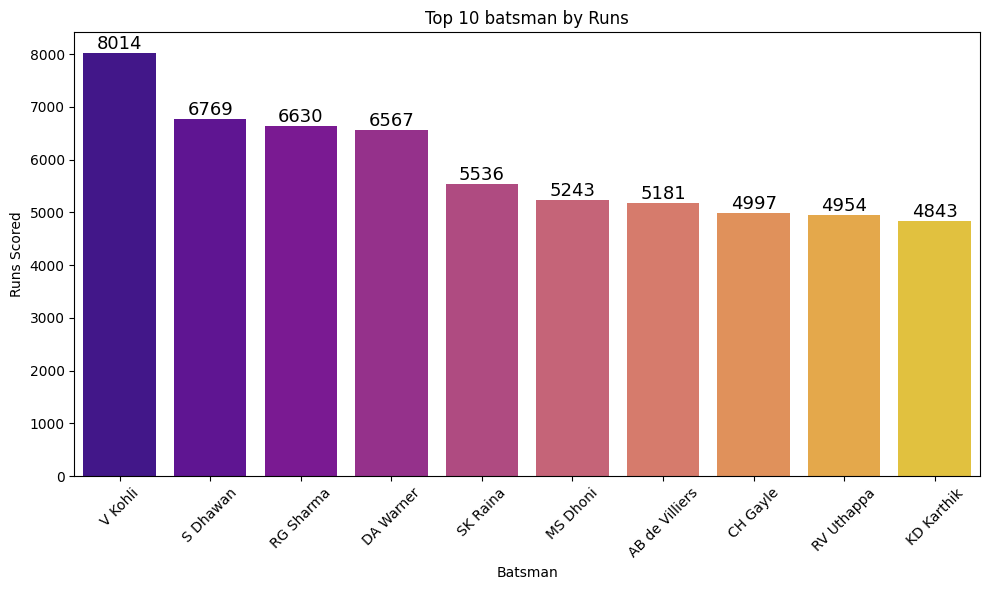

In [26]:
most_runs = df.groupby('batter', as_index=False)['batsman_runs'].sum().sort_values(by='batsman_runs', ascending=False).head(10)
print(most_runs)

#Using seaborn library

palette=sns.color_palette('plasma',n_colors=len(most_runs))

plt.figure(figsize=(10,6))
bargraph=sns.barplot(x='batter',y='batsman_runs',data=most_runs,palette=palette,hue='batter')
   
for bar in bargraph.patches:
    bargraph.annotate(
        int(bar.get_height()),
        (bar.get_x()+bar.get_width()/2, 
        bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=13
    )


plt.title("Top 10 batsman by Runs")
plt.xlabel('Batsman')
plt.ylabel("Runs Scored")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<h1><u>Top 10 Bowlers by Wickets Taken</u></h1>

bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: is_wicket, dtype: int64


<class 'pandas.core.frame.DataFrame'>




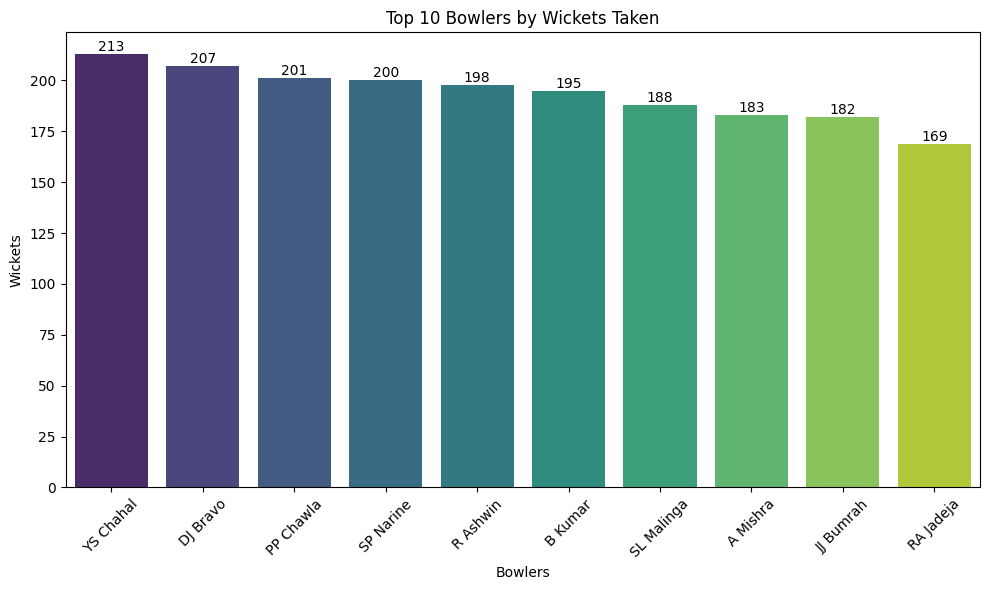

In [31]:
most_wick=df.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)
print(most_wick)
print()
print()

most_wick_df=most_wick.reset_index()
most_wick_df.columns=['bowler','is_wicket']
print(type(most_wick_df))
print()
print()


palette=sns.color_palette('viridis',n_colors=len(most_wick))
plt.figure(figsize=(10,6))

bargraphwick=sns.barplot(x='bowler',y='is_wicket',data=most_wick_df,palette=palette,hue='bowler')


for bar in bargraphwick.patches:
    bargraphwick.annotate(
        int(bar.get_height()),
        (bar.get_x()+bar.get_width()/2,
        bar.get_height()),
        ha='center',
        va='bottom'   
    )

plt.title("Top 10 Bowlers by Wickets Taken")
plt.xlabel("Bowlers")
plt.ylabel("Wickets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1><u>Run Distribution by Over</u></h1>

over
0     13651
1     16163
2     17895
3     18415
4     18565
5     18528
6     14839
7     15981
8     16639
9     16353
10    16779
11    17076
12    17205
13    17634
14    18149
15    18472
16    19012
17    19559
18    19076
19    17765
Name: total_runs, dtype: int64
<class 'pandas.core.frame.DataFrame'>


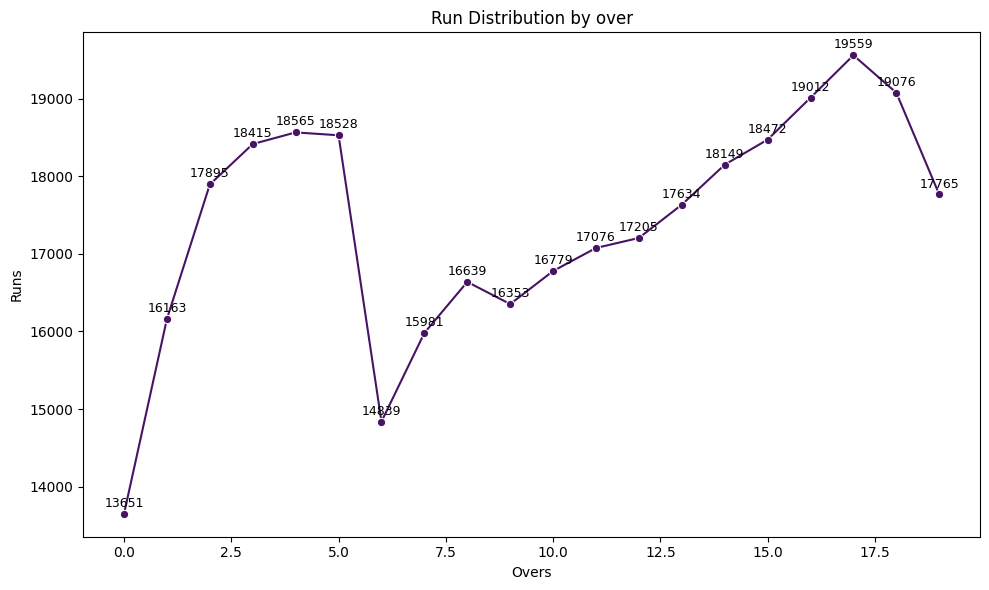

In [36]:
run_distribution=df.groupby(['over'])['total_runs'].sum()
print(run_distribution)

run_distribution_df=run_distribution.reset_index()
run_distribution_df.columns=['overs','runs']
print(type(run_distribution_df))



palette=sns.color_palette('viridis',n_colors=len(run_distribution_df))
plt.figure(figsize=(10,6))
linegraph=sns.lineplot(x='overs',y='runs',data=run_distribution_df,marker='o',legend=False,color=palette[0])

for line in linegraph.lines:
    for x,y in zip(line.get_xdata(),line.get_ydata()):
        linegraph.annotate(
            int(y),
            (x,y),
            textcoords='offset points',
            xytext=(0,5),
            ha='center',
            fontsize=9
        )


plt.title("Run Distribution by over")
plt.xlabel("Overs")
plt.ylabel("Runs")
plt.tight_layout()
plt.show()

<h1><u>Extras Breakdown</u></h1>

extras_type
byes        673
legbyes    4001
noballs    1069
penalty       2
wides      8380
Name: extras_type, dtype: int64
  Type of extra  number of extras
0          byes               673
1       legbyes              4001
2       noballs              1069
3       penalty                 2
4         wides              8380


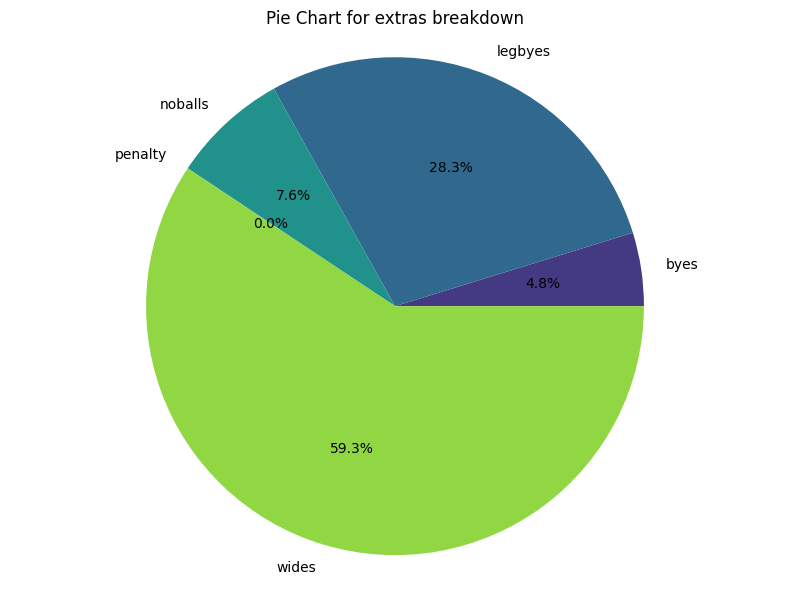

In [39]:
extras=df.groupby(['extras_type'])['extras_type'].count()
print(extras)

extras_df = extras.reset_index(name='number of extras')
extras_df.columns = ['Type of extra', 'number of extras']
print(extras_df)



colors=sns.color_palette('viridis',len(extras_df))

plt.figure(figsize=(8,6))

extras_df.set_index('Type of extra')['number of extras'].plot(kind='pie',
                                                             autopct='%1.1f%%',
                                                             colors=colors,
                                                            )

plt.title("Pie Chart for extras breakdown")
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()


<h1><u>Extras Analysis</u></h1>

dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: dismissal_kind, dtype: int64
          dismissal_kind  Number of dismissals
0                 caught                  8063
1                 bowled                  2212
2                run out                  1114
3                    lbw                   800
4      caught and bowled                   367
5                stumped                   358
6           retired hurt                    15
7             hit wicket                    15
8  obstructing the field                     3
9            retired out                     3


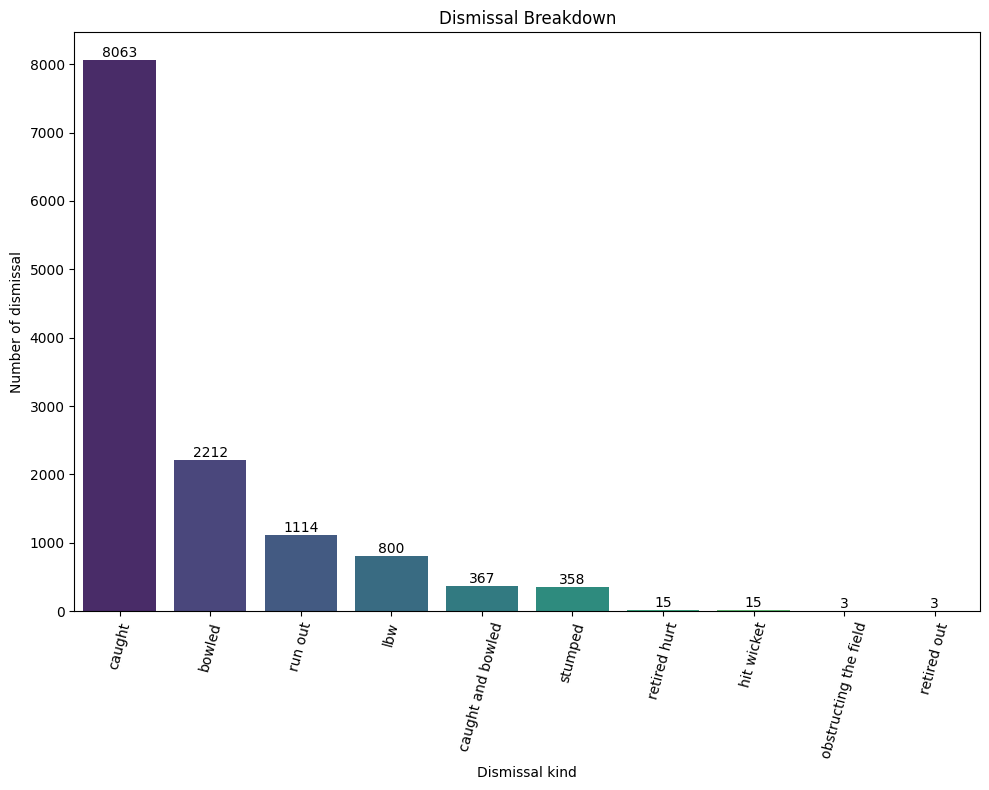

In [44]:
dismissal=df.groupby(['dismissal_kind'])['dismissal_kind'].count()
dismissal_s=dismissal.sort_values(ascending=False)
print(dismissal_s)

dismissal_df=dismissal_s.reset_index(name='Number of dismissals')
dismissal_df.columns=['dismissal_kind','Number of dismissals']
print(dismissal_df)


palette=sns.color_palette('viridis',n_colors=len(dismissal_df))

plt.figure(figsize=(10,8))



bardis=sns.barplot(x='dismissal_kind',y='Number of dismissals',data=dismissal_df,palette=palette,hue='dismissal_kind')

for bar in bardis.patches:
    bardis.annotate(
        int(bar.get_height()),
        (bar.get_x()+bar.get_width()/2,
        bar.get_height()),
        ha='center',
        va='bottom'   
    )

plt.title("Dismissal Breakdown")
plt.xlabel("Dismissal kind")
plt.ylabel("Number of dismissal")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


<h1><u>Team Performance Analysis</u></h1>

batting_team
Mumbai Indians                 42176
Kolkata Knight Riders          39331
Chennai Super Kings            38629
Royal Challengers Bangalore    37692
Rajasthan Royals               34747
Kings XI Punjab                30064
Sunrisers Hyderabad            29071
Delhi Daredevils               24296
Delhi Capitals                 14900
Deccan Chargers                11463
Punjab Kings                    9536
Gujarat Titans                  7757
Lucknow Super Giants            7510
Pune Warriors                   6358
Gujarat Lions                   4862
Royal Challengers Bengaluru     2930
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Kochi Tuskers Kerala            1901
Name: total_runs, dtype: int64


                          Teams   Runs
0                Mumbai Indians  42176
1         Kolkata Knight Riders  39331
2           Chennai Super Kings  38629
3   Royal Challengers Bangalore  37692
4              Rajasthan Royals  34747
5               K

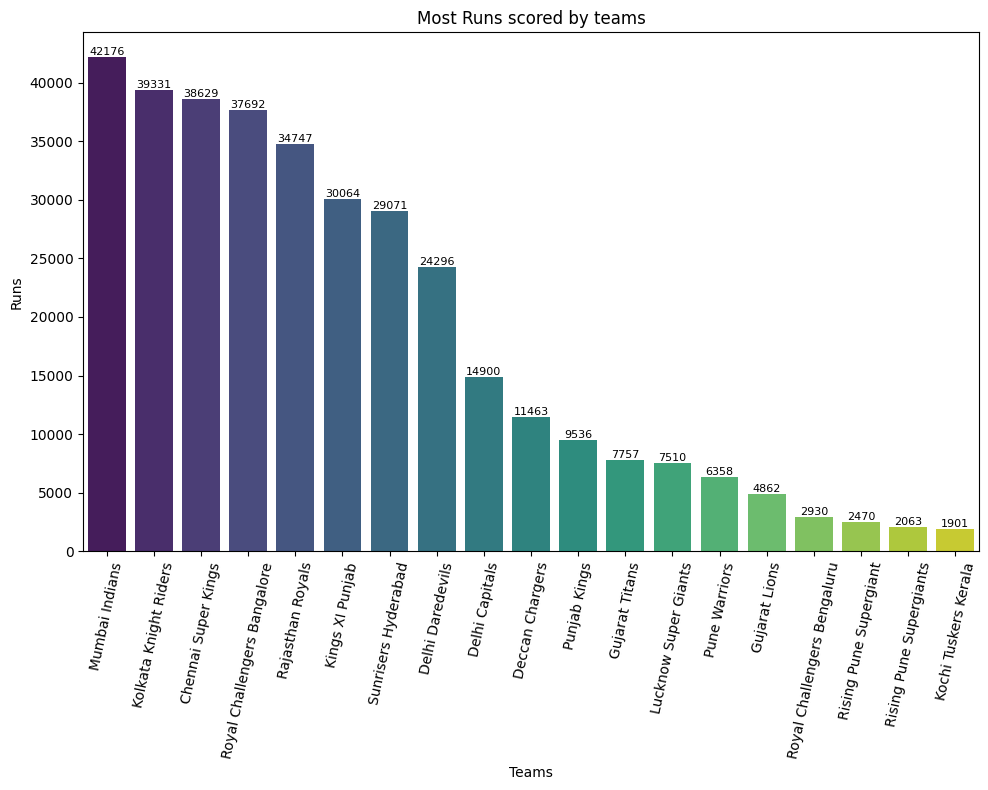

In [51]:
team_run=df.groupby(['batting_team'])['total_runs'].sum()
team_runs=team_run.sort_values(ascending=False)
print(team_runs)
print()
print()

team_run_df=team_runs.reset_index()
team_run_df.columns=['Teams','Runs']
print(team_run_df)
print()
print()

palette=sns.color_palette('viridis',n_colors=len(team_run_df))

plt.figure(figsize=(10,8))

barteam=sns.barplot(x='Teams',y='Runs',data=team_run_df,palette=palette,hue='Teams')


# barteam=team_run_df.plot(kind='bar',x='Teams',figsize=(10,9),legend=False)

for bar in barteam.patches:
    barteam.annotate(
        int(bar.get_height()),
        (bar.get_x()+bar.get_width()/2,
        bar.get_height()),
        ha='center',
        va='bottom'   ,
        fontsize=8
    )

plt.title("Most Runs scored by teams")
plt.xlabel("Teams")
plt.ylabel("Runs")
plt.xticks(rotation=78,fontsize=10)
plt.tight_layout()
plt.show()


                             Total Runs  Total Wickets
Teams                                                 
Mumbai Indians                    42176           1573
Kolkata Knight Riders             39331           1491
Chennai Super Kings               38629           1245
Royal Challengers Bangalore       37692           1384
Rajasthan Royals                  34747           1312
Kings XI Punjab                   30064           1158
Sunrisers Hyderabad               29071           1058
Delhi Daredevils                  24296            952
Delhi Capitals                    14900            570
Deccan Chargers                   11463            484
Punjab Kings                       9536            371
Gujarat Titans                     7757            247
Lucknow Super Giants               7510            276
Pune Warriors                      6358            298
Gujarat Lions                      4862            188
Royal Challengers Bengaluru        2930             99
Rising Pun

C:\Users\govinda prasad\AppData\Local\Temp\ipykernel_22828\1767618342.py:20: UserWarning: The palette list has more values (19) than needed (2), which may not be intended.
  barteam1 = sns.barplot(x='Teams', y='Value', data=team_run_df_long,


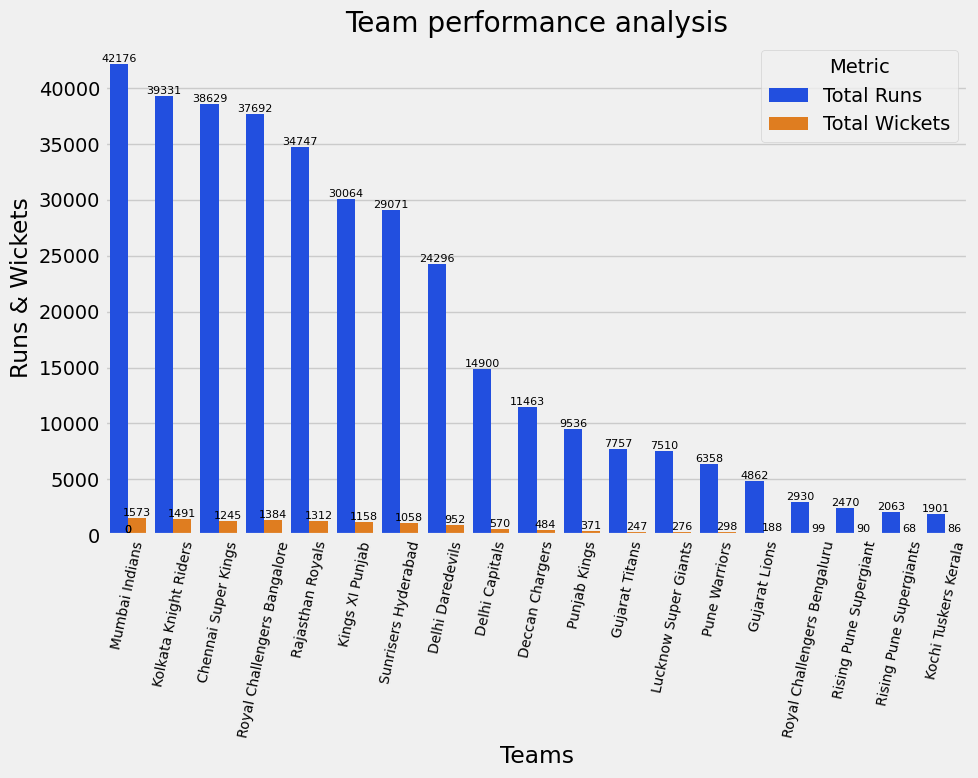

In [73]:
team_run=df.groupby('batting_team')
team_run=team_run[['total_runs', 'is_wicket']].sum()
team_run.columns=["Total Runs","Total Wickets"]
team_run.sort_values('Total Runs',ascending=False)
team_run_df=team_run.rename_axis("Teams").sort_values('Total Runs',ascending=False)
print(team_run_df)

team_run_df_ =team_run_df.reset_index()
team_run_df_.columns=['Teams','Total Runs','Total Wickets']
type(team_run_df_)

team_run_df_long = pd.melt(team_run_df_, id_vars='Teams', 
                            value_vars=['Total Runs', 'Total Wickets'], 
                            var_name='Metric', value_name='Value')

# Step 2: Create the bar plot
palette = sns.color_palette('bright', n_colors=len(team_run_df_))

plt.figure(figsize=(10, 8))
barteam1 = sns.barplot(x='Teams', y='Value', data=team_run_df_long, 
                        palette=palette, hue='Metric')





for bar in barteam1.patches:
    barteam1.annotate(
        int(bar.get_height()),
        (bar.get_x()+bar.get_width()/2,
        bar.get_height()),
        ha='center',
        va='bottom'   ,
        fontsize=8
    )

plt.title("Team performance analysis")
plt.xlabel("Teams")
plt.ylabel("Runs & Wickets")
plt.xticks(rotation=78,fontsize=10)
plt.tight_layout()
plt.show()


In [71]:
plt.style.use('fivethirtyeight')

<h1><u>Average run per over</u></h1>

    over  average_runs
0      0      0.981663
1      1      1.173528
2      2      1.316099
3      3      1.356538
4      4      1.369100
5      5      1.373055
6      6      1.103107
7      7      1.189948
8      8      1.242087
9      9      1.224577
10    10      1.262623
11    11      1.287686
12    12      1.301240
13    13      1.343645
14    14      1.393504
15    15      1.434273
16    16      1.498778
17    17      1.587839
18    18      1.646896
19    19      1.776855


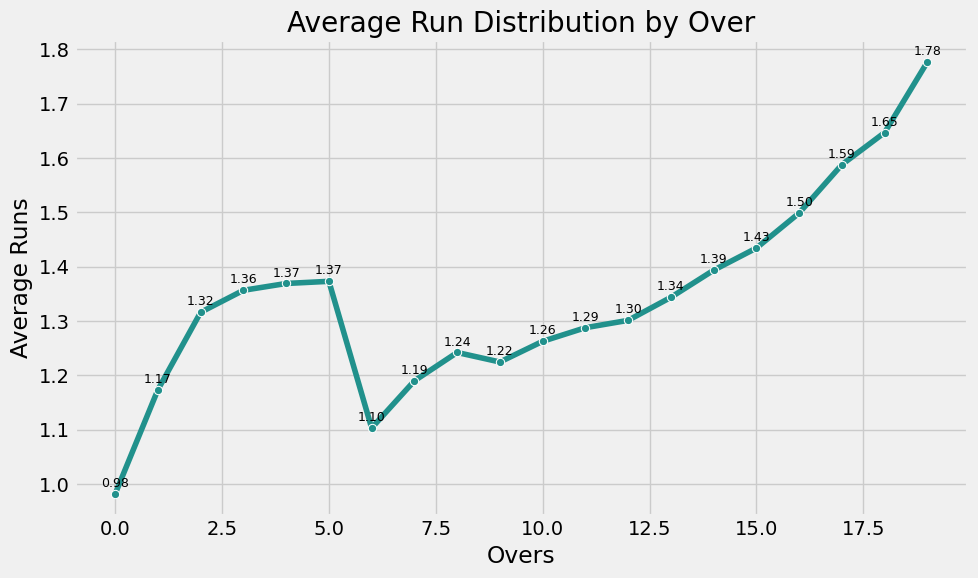

In [80]:
avg = df.groupby('over')['total_runs'].mean().reset_index()
avg.columns = ['over', 'average_runs']  
print(avg)
palette = sns.color_palette('viridis', n_colors=1)

plt.figure(figsize=(10, 6))
linegraph = sns.lineplot(x='over', y='average_runs', data=avg, marker='o', legend=False, color=palette[0])

for line in linegraph.lines:
    for x,y in zip(line.get_xdata(),line.get_ydata()):
        linegraph.annotate(
              f"{y:.2f}",
            (x,y),
            textcoords='offset points',
            xytext=(0,5),
            ha='center',
            fontsize=9
        )





plt.title("Average Run Distribution by Over")
plt.xlabel("Overs")
plt.ylabel("Average Runs")
plt.tight_layout()
plt.show()

<h1><u>Wicket Fall Distribution by Over</u></h1>

    over  number_of_wickets
0      0                463
1      1                503
2      2                533
3      3                548
4      4                576
5      5                540
6      6                444
7      7                472
8      8                537
9      9                498
10    10                568
11    11                567
12    12                585
13    13                633
14    14                695
15    15                736
16    16                779
17    17                976
18    18                989
19    19               1308




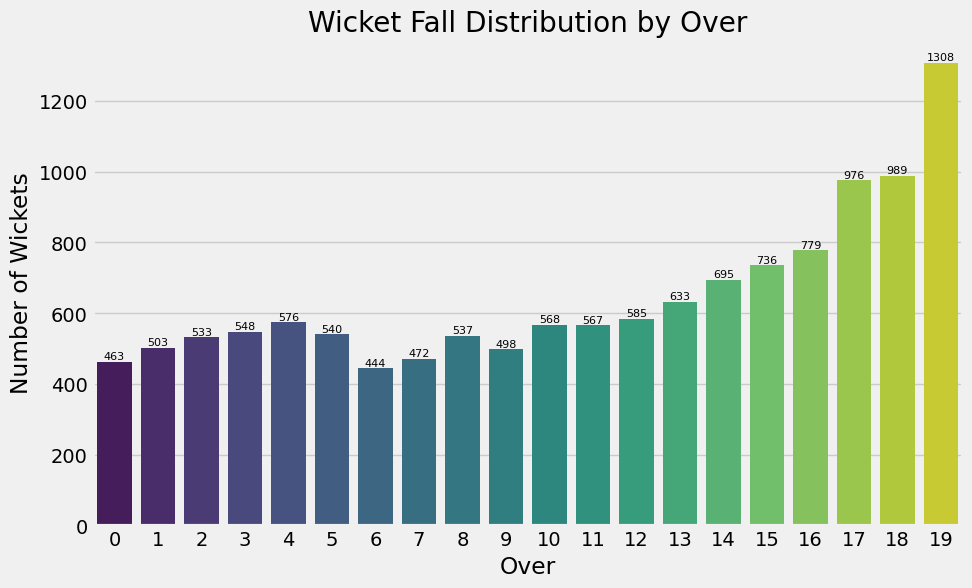

In [84]:
wick = df[df['is_wicket'] == 1]
wickets_per_over = wick.groupby('over')['is_wicket'].count().reset_index()
wickets_per_over.columns = ['over', 'number_of_wickets'] 
print(wickets_per_over)
print()
print()
palette = sns.color_palette('viridis', n_colors=len(wickets_per_over))

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='over', y='number_of_wickets', data=wickets_per_over, palette=palette,hue='over',legend=False)

for bar in barplot.patches:
    barplot.annotate(
        int(bar.get_height()),  
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center',
        va='bottom',
        fontsize=8
    )


plt.title('Wicket Fall Distribution by Over')
plt.xlabel('Over')
plt.ylabel('Number of Wickets')
plt.grid(True, axis='y')
plt.show()

<h1><u> Partnership Analysis (Top 10 Partnerships by Total Runs)</u></h1>

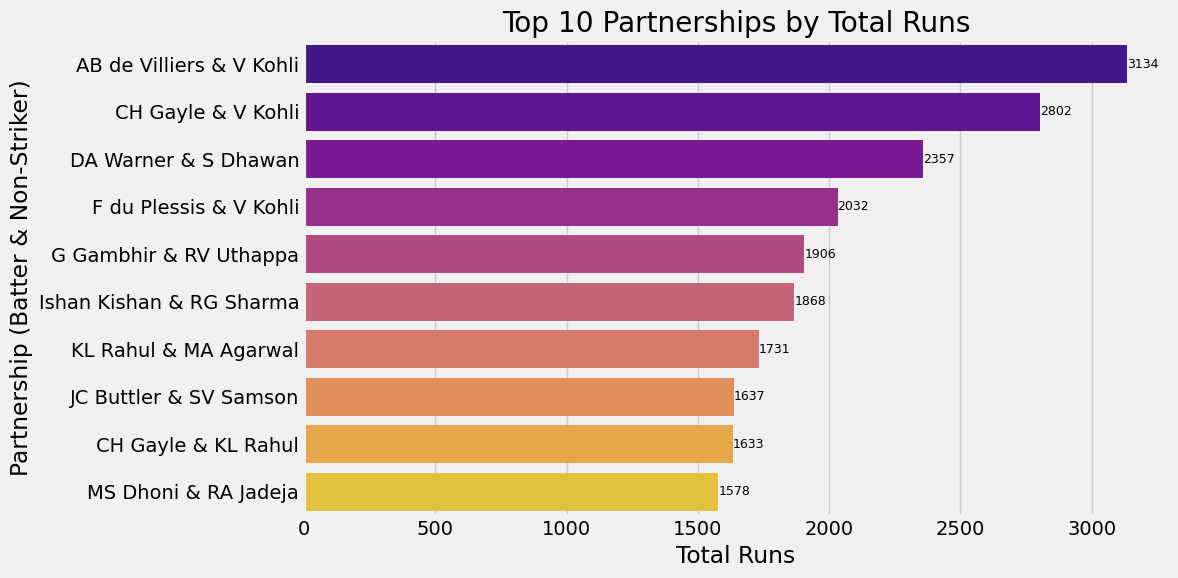

In [218]:

# Step 1: Group the data by 'Striker' and 'Non_Striker', then sum the 'Runs'
partner = df.groupby(['batter', 'non_striker'])['total_runs'].sum()
partner_df = partner.reset_index()
partner_df.columns = ['Striker', 'Non_Striker', 'Runs']

# Step 2: Sort the 'Striker' and 'Non_Striker' columns to handle combinations as the same
partner_df['sorted_pair'] = partner_df.apply(lambda row: tuple(sorted([row['Striker'], row['Non_Striker']])), axis=1)


# Step 3: Group by the sorted pairs and sum the total runs
partnership_data = partner_df.groupby('sorted_pair')['Runs'].sum().reset_index()


# Step 4: Sort by 'Runs' and keep the top 10
top_partnerships = partnership_data.nlargest(10,"Runs")

# Step 5: Create a color palette
palette = sns.color_palette('plasma', n_colors=len(top_partnerships))

# Step 6: Plot the data
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    y=top_partnerships['sorted_pair'].apply(lambda row: f"{row[0]} & {row[1]}"),  # Create labels for each partnership
    x=top_partnerships['Runs'], palette=palette)

plt.title('Top 10 Partnerships by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Partnership (Batter & Non-Striker)')
plt.grid(True, axis='x')

# Annotate each bar with the total runs
for bar in barplot.patches:
    barplot.annotate(
        int(bar.get_width()), 
        (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
        ha='left',
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()

<h1><u> Batsman vs Bowler Analysis</u></h1>

batter     bowler   
DA Warner  SP Narine    204
V Kohli    R Ashwin     192
RG Sharma  UT Yadav     179
SK Raina   PP Chawla    176
V Kohli    UT Yadav     171
           A Mishra     170
           RA Jadeja    166
           DJ Bravo     164
KL Rahul   DL Chahar    162
DA Warner  YS Chahal    160
Name: total_runs, dtype: int64


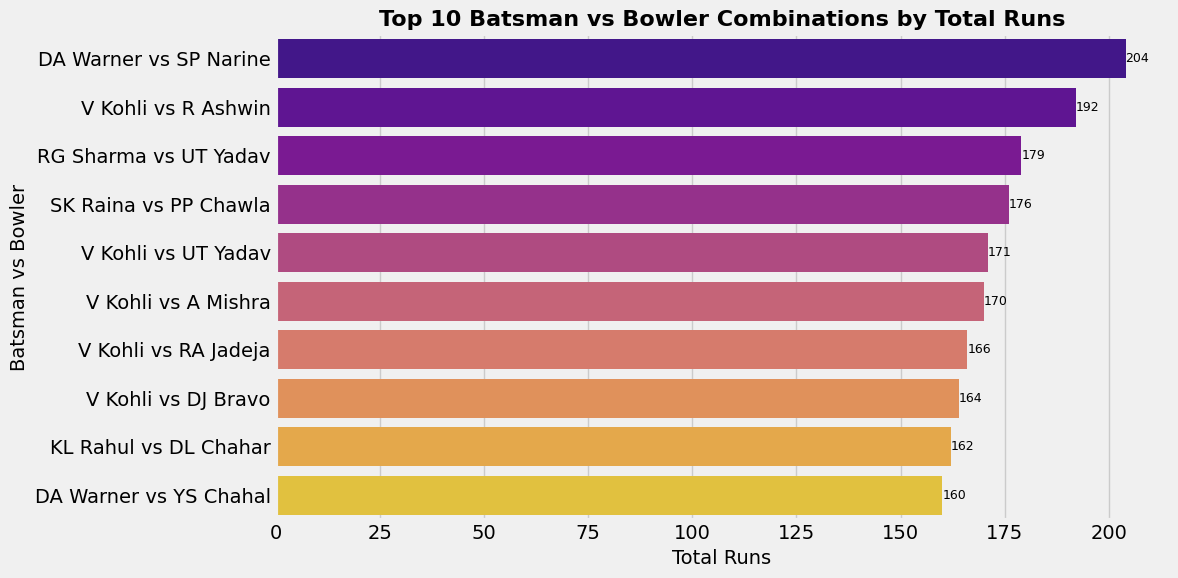

In [194]:
batball=df.groupby(['batter','bowler'])['total_runs'].sum()
bar1=batball.nlargest(10)
print(bar1)
print
batball = df.groupby(['batter', 'bowler'])['total_runs'].sum()
bar1 = batball.nlargest(10).reset_index()  # Reset index to convert to DataFrame
bar1.columns = ['Batter', 'Bowler', 'Total Runs']  # Rename columns
warnings.filterwarnings("ignore")

# Step 2: Create the Seaborn Bar Plot
plt.figure(figsize=(12, 6))
palette = sns.color_palette('plasma', n_colors=len(bar1))  # Define color palette

barplot = sns.barplot(
    x='Total Runs',
    y=bar1.apply(lambda row: f"{row['Batter']} vs {row['Bowler']}", axis=1),  # Create labels
    data=bar1,
    palette=palette
)

# Step 3: Adding Title and Labels
plt.title('Top 10 Batsman vs Bowler Combinations by Total Runs', fontsize=16, fontweight='bold')
plt.xlabel('Total Runs', fontsize=14)
plt.ylabel('Batsman vs Bowler', fontsize=14)


# Step 5: Annotate Bars
for bar in barplot.patches:
    barplot.annotate(
        int(bar.get_width()), 
        (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
        ha='left',
        va='center',
        fontsize=9
    )

# Step 6: Final Layout
plt.tight_layout()
plt.show()

<h1><u> Wickets by Dismissal Kind per Bowler</u></h1>

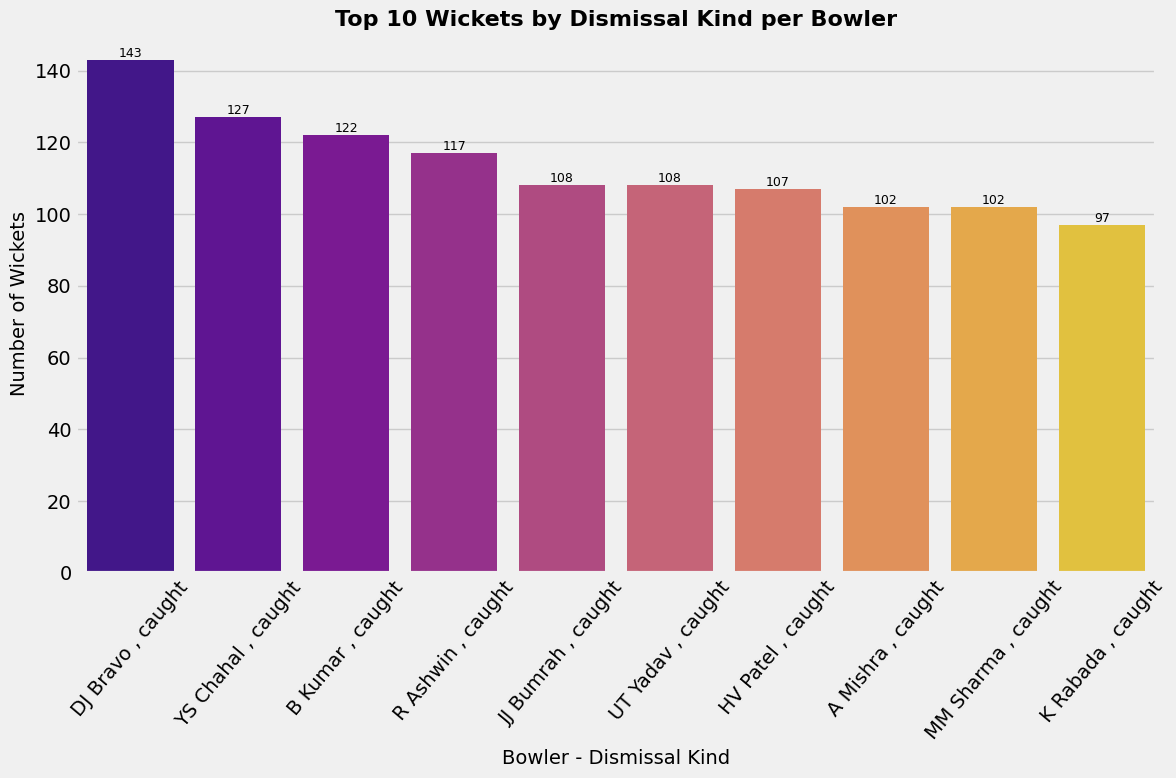

In [315]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with wicket information
wickball = df[df['is_wicket'] == 1]
diskind = wickball.groupby(['bowler', 'dismissal_kind'])['is_wicket'].sum()

# Get the top 10 combinations
dis = diskind.nlargest(10).reset_index()  # Reset index to create a DataFrame
dis.columns = ['Bowler', 'Dismissal Kind', 'Number of Wickets']  # Rename columns

# Create a color palette
palette = sns.color_palette('plasma', n_colors=len(dis))

# Create the Seaborn Bar Plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x=dis.apply(lambda row: f"{row['Bowler']} , {row['Dismissal Kind']}", axis=1),  # Create labels
    y='Number of Wickets',
    data=dis,
    palette=palette
)

# Step 3: Adding Title and Labels
plt.title('Top 10 Wickets by Dismissal Kind per Bowler', fontsize=16, fontweight='bold')
plt.xlabel('Bowler - Dismissal Kind', fontsize=14)
plt.ylabel('Number of Wickets', fontsize=14)
plt.xticks(rotation=50)

# Step 5: Annotate Bars
for bar in barplot.patches:
    barplot.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position at the top of the bar
        ha='center',
        va='bottom',
        fontsize=9
    )

# Step 6: Final Layout
plt.tight_layout()
plt.show()


<h1><u>Extras Conceded per Bowling Team</u></h1>

                   bowling_team  extra_runs
0                Mumbai Indians        2295
1   Royal Challengers Bangalore        2040
2         Kolkata Knight Riders        1957
3              Rajasthan Royals        1917
4           Chennai Super Kings        1842
5               Kings XI Punjab        1571
6              Delhi Daredevils        1268
7           Sunrisers Hyderabad        1254
8                Delhi Capitals         725
9               Deccan Chargers         659
10                 Punjab Kings         480
11         Lucknow Super Giants         386
12                Pune Warriors         335
13               Gujarat Titans         295
14                Gujarat Lions         188
15  Royal Challengers Bengaluru         151
16       Rising Pune Supergiant         111
17         Kochi Tuskers Kerala         110
18      Rising Pune Supergiants         108


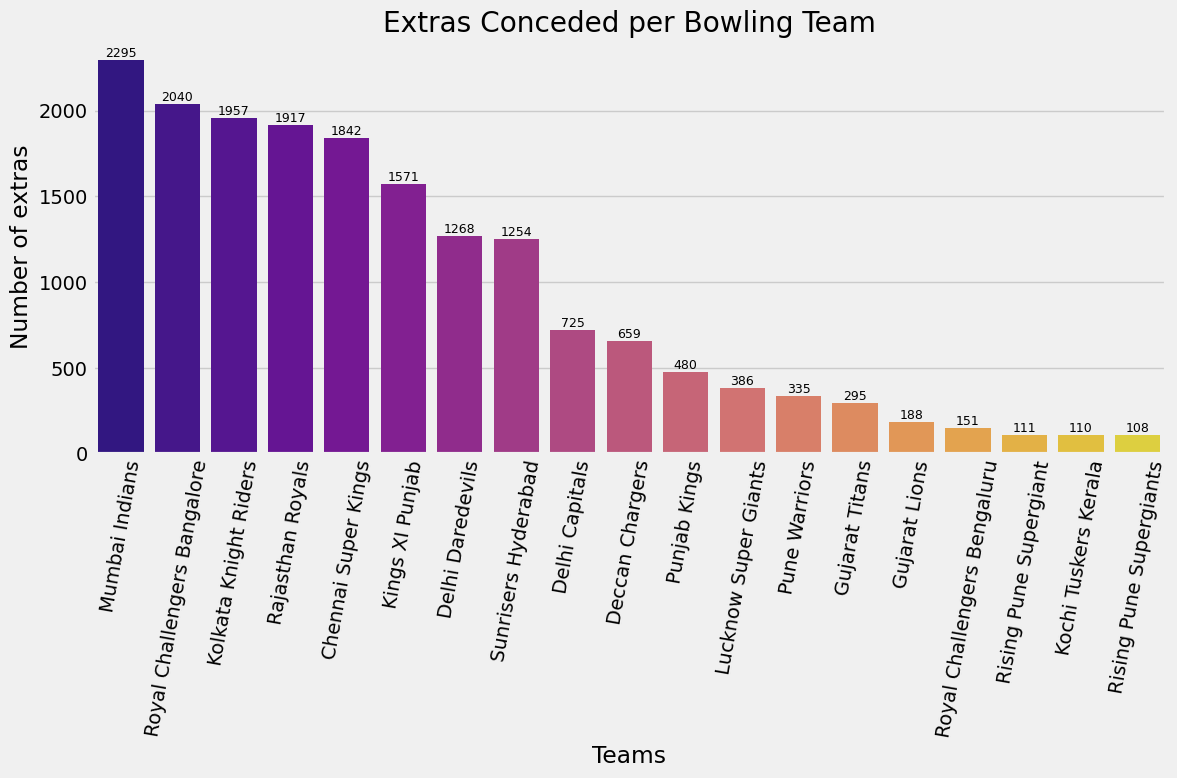

In [313]:
ex=df.groupby('bowling_team')['extra_runs'].sum()
ex_df=ex.sort_values(ascending=False)

ex_df_1=ex_df.reset_index()
ex_df_1.columns=['bowling_team','extra_runs']
print(ex_df_1)
palette = sns.color_palette('plasma', n_colors=len(ex_df_1))

# Create the Seaborn Bar Plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='bowling_team',  # Create labels
    y='extra_runs',
    data=ex_df_1,
    palette=palette
)



# Step 5: Annotate Bars
for bar in barplot.patches:
    barplot.annotate(
        int(bar.get_height()), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position at the top of the bar
        ha='center',
        va='bottom',
        fontsize=9
    )



plt.title('Extras Conceded per Bowling Team')
plt.xlabel('Teams')
plt.ylabel('Number of extras')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()








In [300]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [311]:
plt.style.use('fivethirtyeight')